<a href="https://colab.research.google.com/github/ivanozono/python_DataAnalyts/blob/main/Pivot_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot Tables

In [1]:
## import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
## load dataset from the SNS module
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic['survived'].mean()

0.3838383838383838

In [5]:
titanic.shape[0]

891

In [6]:
titanic['survived'].sum()/titanic.shape[0]

0.3838383838383838

In [7]:
titanic['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [8]:
titanic[['adult_male','age']]

,adult_male,age
0,True,22.0
1,False,38.0
2,False,26.0
3,False,35.0
4,True,35.0
...,...,...
886,True,27.0
887,False,19.0
888,False,NaN
889,True,26.0


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


As the output shows, this contains a number of data points on each passenger on that ill-fated voyage, including sex, age, class, fare paid, and much more.

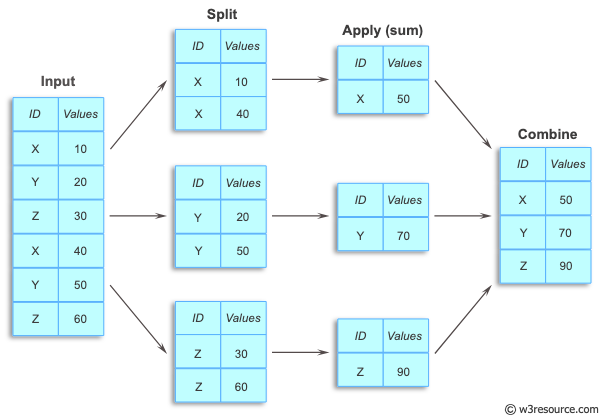

In [10]:
titanic.groupby('embarked').mean()

<ipython-input-10-8e7849956c0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('embarked').mean()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embarked,,,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.535714,0.505952
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.480519,0.740260
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.636646,0.610248


In [11]:
## groupby by the category
sex_gb = titanic.groupby('embarked')[['survived']].mean()
sex_gb

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [12]:
sex_gb.columns

Index(['survived'], dtype='object')

In [15]:
gby1 = titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack(0)
gby1

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [16]:
gby1.columns

Index(['female', 'male'], dtype='object', name='sex')

In [18]:
gby1.index

CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

In [19]:
titanic.groupby(['class', 'sex'])['survived'].aggregate('mean').unstack(0)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [20]:
gby2 = titanic.groupby(['sex', 'class'])['survived'].mean().reset_index()
gby2

,sex,class,survived
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


In [21]:
gby2.columns

Index(['sex', 'class', 'survived'], dtype='object')

In [22]:
gby2.index

RangeIndex(start=0, stop=6, step=1)

In [23]:
gby2.iloc[0:2,0:2]

,sex,class
0,female,First
1,female,Second


## Pivot Table Syntax

Here is the equivalent to the preceding operation using the `DataFrame.pivot_table` method:

In [24]:
pvt_cls = titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')
pvt_cls

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multilevel Pivot Tables

Just as in a `groupby`, the grouping in pivot tables can be specified with multiple levels and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the `pd.cut` function:

In [25]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid, using `pd.qcut` to automatically compute quantiles:

In [26]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### Additional Pivot Table Options

The full call signature of the `DataFrame.pivot_table` method is as follows:

```python
# call signature as of Pandas 1.3.5
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All', observed=False,
                      sort=True)
```

In [27]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the `values` keyword; when specifying a mapping for `aggfunc`, this is determined automatically.

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

In [28]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here, this automatically gives us information about the class-agnostic survival rate by sex, the sex-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the `margins_name` keyword; it defaults to `"All"`.

In [29]:
# shell command to download the data
births=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

In [30]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [31]:
births.shape

(15547, 5)

In [32]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


Taking a look at the data, we see that it's relatively simple—it contains the number of births grouped by date and gender:

In [33]:
births.shape

(15547, 5)

We can start to understand this data a bit more by using a pivot table.
Let's add a `decade` column, and take a look at male and female births as a function of decade:

In [34]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import missingno as msno


El texto es una línea de código en Python que utiliza la función `msno.bar()` para graficar la cantidad de valores faltantes en un conjunto de datos llamado "births". La función `msno.bar()` es parte de la librería `missingno`, que se utiliza para visualizar datos faltantes en los conjuntos de datos. El término "msno" es un acrónimo de "missingno".


<Axes: >

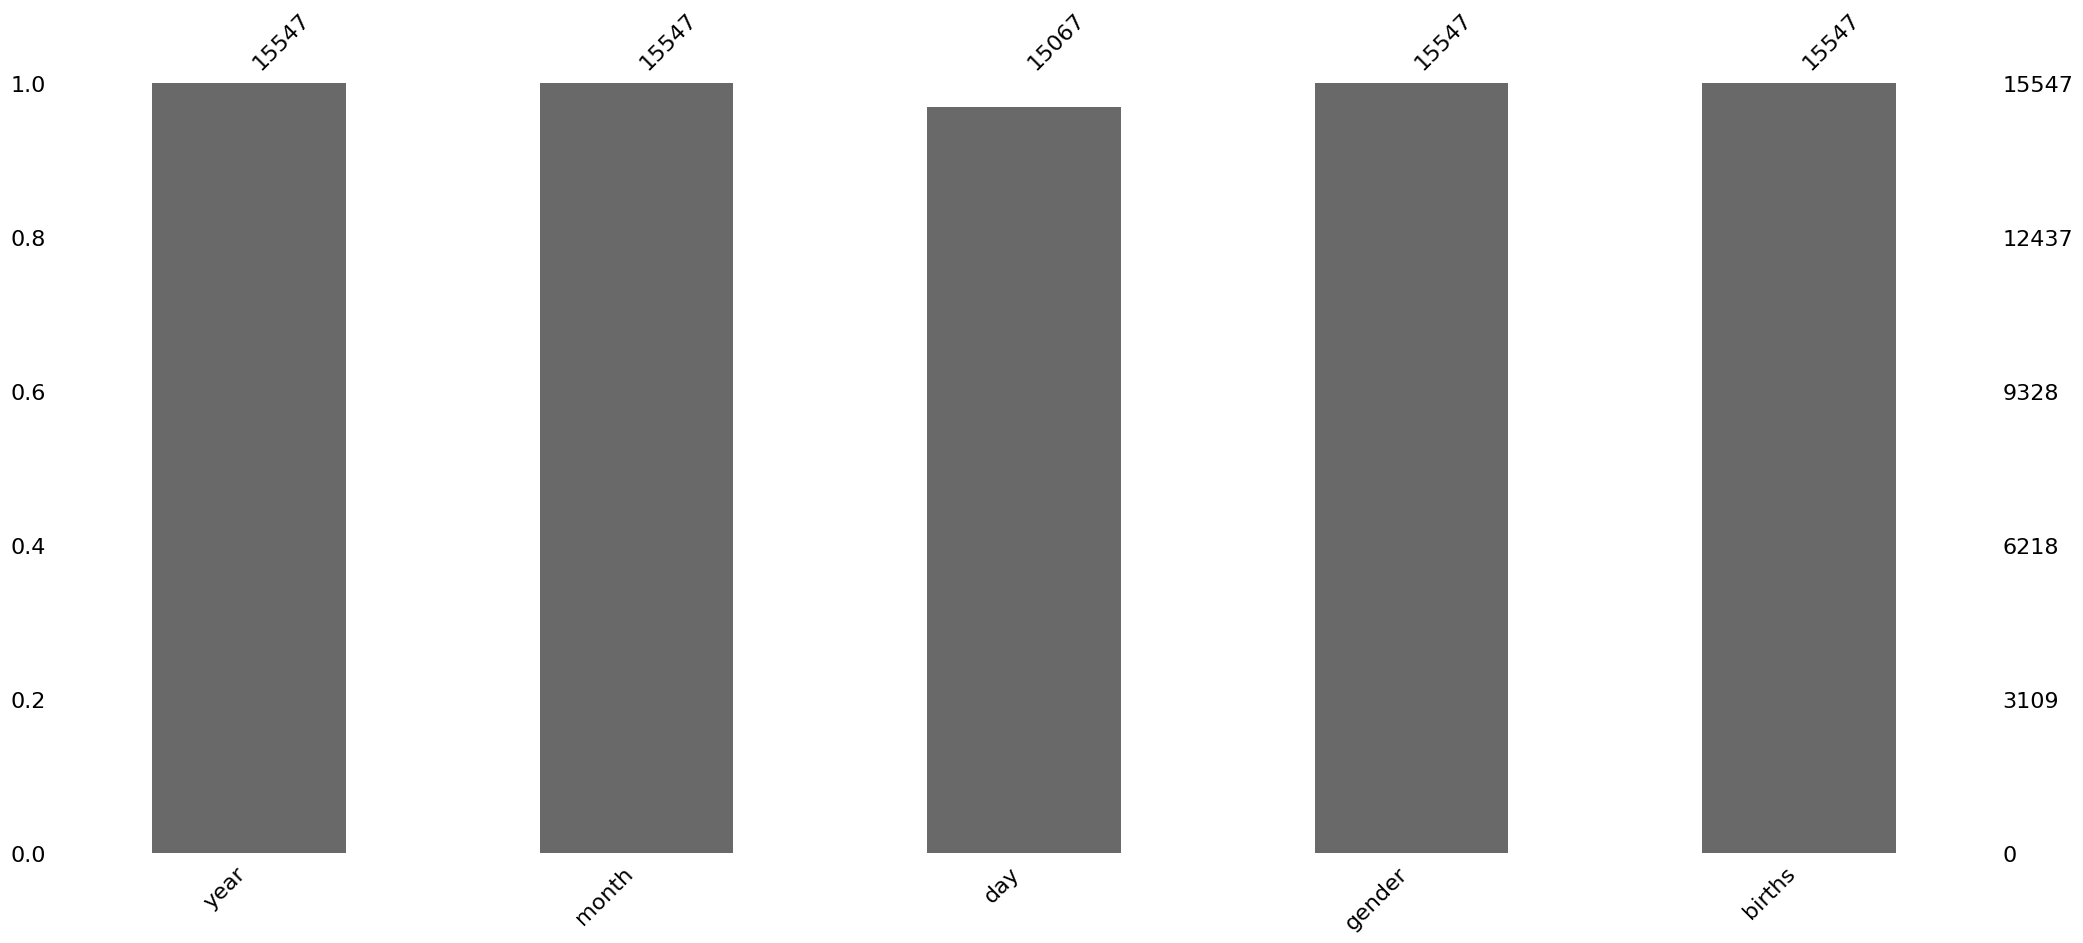

In [36]:
msno.bar(births)

<Axes: >

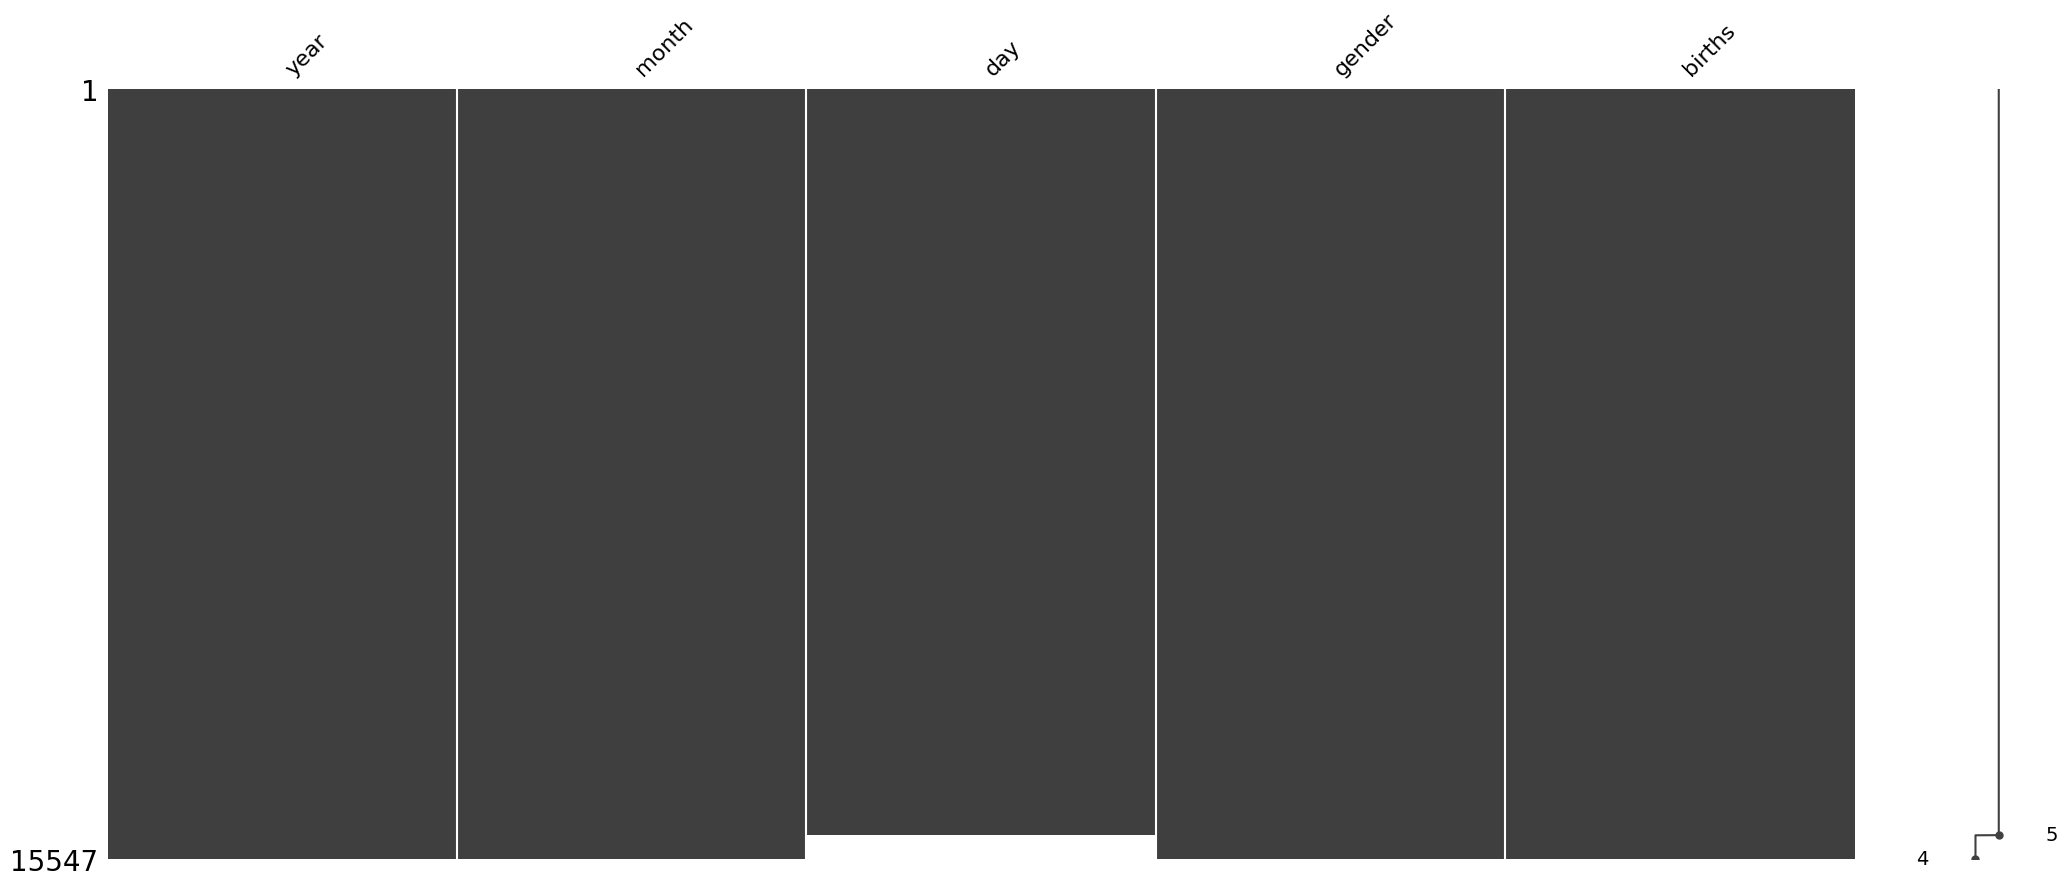

In [37]:
msno.matrix(births)

In [38]:
## create a new column called 'decade'
births['decade'] = 10 * (births['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [39]:
births.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,15547.0,1979.037435,6.728340,1969.0,1974.0,1979.0,1984.0,2008.0
month,15547.0,6.515919,3.449632,1.0,4.0,7.0,10.0,12.0
day,15067.0,17.769894,15.284034,1.0,8.0,16.0,24.0,99.0
births,15547.0,9762.293561,28552.465810,1.0,4358.0,4814.0,5289.5,199622.0
decade,15547.0,1974.544285,6.789583,1960.0,1970.0,1970.0,1980.0,2000.0


In [40]:
births.decade.value_counts().sum()

15547

In [41]:
pvt_sum = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
pvt_sum

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year, as shown in the following figure (see [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) for a discussion of plotting with Matplotlib):

In [42]:
births.pivot_table(
    'births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


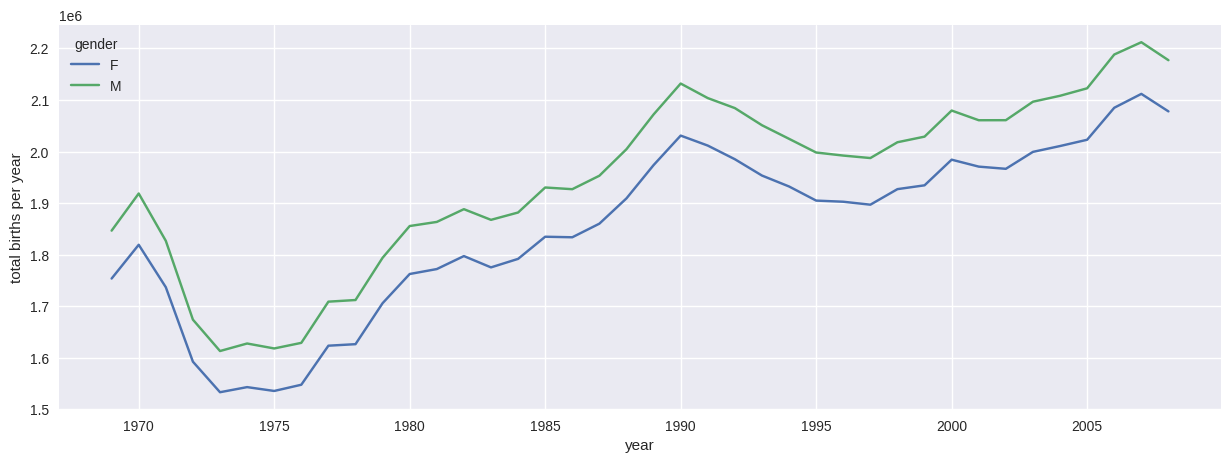

In [43]:
## generate a plot of the total births by year by gender
plt.style.use('seaborn-v0_8')
births.pivot_table(
    'births', index='year', columns='gender', aggfunc='sum').plot(figsize=(15, 5))
plt.ylabel('total births per year')
plt.show()

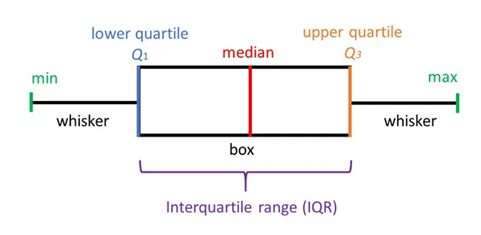

In [44]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [45]:
mu = quartiles[1]
mu

4814.0

In [46]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.31

In [47]:
births_subset = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [48]:
births_subset.shape

(14610, 6)

<Axes: xlabel='births', ylabel='Count'>

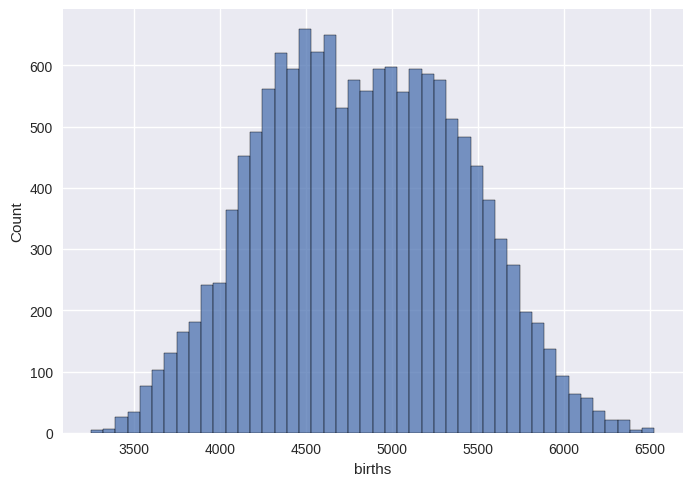

In [49]:
sns.histplot(data=births_subset, x='births')

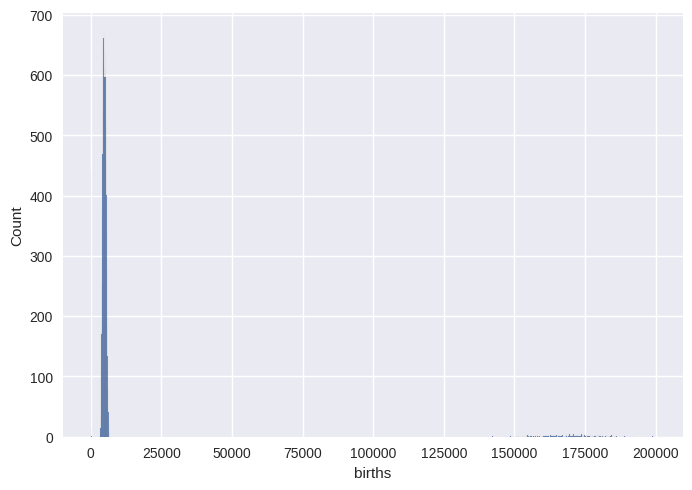

In [50]:
sns.histplot(data=births, x='births')
plt.show()

In [51]:
len(births_subset) - len(births)

-937

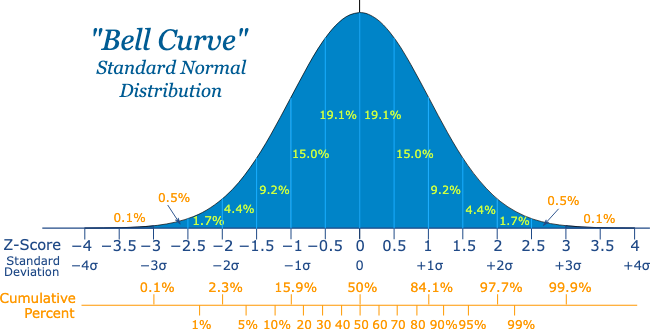

In [52]:
m = np.mean(births.births)
s = np.std(births.births)
births['Z-score'] = (births.births - m)/s

In [53]:
births.head()

,year,month,day,gender,births,decade,Z-score
0,1969,1,1.0,F,4046,1960,-0.200210
1,1969,1,1.0,M,4440,1960,-0.186410
2,1969,1,2.0,F,4454,1960,-0.185920
3,1969,1,2.0,M,4548,1960,-0.182627
4,1969,1,3.0,F,4548,1960,-0.182627


In [54]:
births_outlier = births[abs(births['Z-score']) > 3]

In [55]:
births_outlier

,year,month,day,gender,births,decade,Z-score
15067,1989,1,NaN,F,156749,1980,5.148117
15068,1989,1,NaN,M,164052,1980,5.403900
15069,1989,2,NaN,F,146710,1980,4.796507
15070,1989,2,NaN,M,154047,1980,5.053481
15071,1989,3,NaN,F,165889,1980,5.468240
...,...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000,6.075212
15543,2008,11,NaN,F,158939,2000,5.224820
15544,2008,11,NaN,M,165468,2000,5.453494
15545,2008,12,NaN,F,173215,2000,5.724828


In [56]:
births_outlier['year'].value_counts()

1989    24
1990    24
2007    24
2006    24
2005    24
2004    24
2003    24
2002    24
2001    24
2000    24
1999    24
1998    24
1997    24
1996    24
1995    24
1994    24
1993    24
1992    24
1991    24
2008    24
Name: year, dtype: int64

In [57]:
births_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [58]:
births.isnull().sum()

year         0
month        0
day        480
gender       0
births       0
decade       0
Z-score      0
dtype: int64

In [59]:
births_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [60]:
births_subset.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [61]:
# Create a datetime index from the year, month, and day columns
births_subset.index = pd.to_datetime(10000 * births_subset.year +
                              100 * births_subset.month +
                              births_subset.day, format='%Y%m%d')


In [62]:
births_subset.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1.0,F,4046,1960
1969-01-01,1969,1,1.0,M,4440,1960
1969-01-02,1969,1,2.0,F,4454,1960
1969-01-02,1969,1,2.0,M,4548,1960
1969-01-03,1969,1,3.0,F,4548,1960


In [63]:
births_subset['decade'].value_counts()

1970    7304
1980    6576
1960     730
Name: decade, dtype: int64

In [64]:
births_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1969-01-01 to 1988-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [67]:
type(births_subset.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [69]:
# Pivot the data by day and decade
births_subset.pivot_table('births', [births_subset.index.month, births_subset.index.day])

# Print the first five rows of the pivot table
births_by_date.head(5)

NameError: ignored

Using this, we can plot births by weekday for several decades (see the following figure):

In [70]:
births_subset.pivot_table('births', index='day', columns='decade', aggfunc='mean')

decade,1960,1970,1980
day,,,
1.0,4840.916667,4517.466667,5030.000000
2.0,4903.916667,4538.345833,5075.328704
3.0,5012.583333,4555.191667,5071.939815
4.0,4899.333333,4496.337500,5045.754630
5.0,4858.333333,4536.512500,5053.648148
6.0,4848.750000,4568.412500,5070.759259
7.0,4911.166667,4576.270833,5082.907407
8.0,4987.583333,4571.345833,5118.291667
9.0,4883.416667,4570.383333,5097.041667


In [71]:
from datetime import datetime

In [72]:
births_subset['dayofweek'] = births_subset.index.dayofweek

<ipython-input-72-debf35775afc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_subset['dayofweek'] = births_subset.index.dayofweek


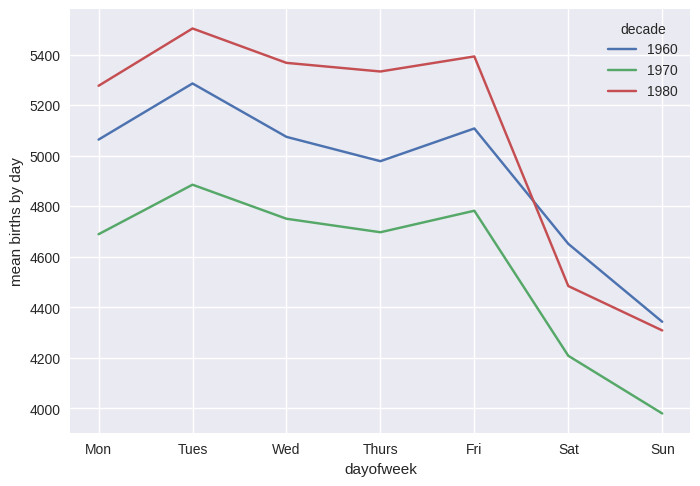

In [73]:
## plot of average number of births by days of the week by decade
births_subset.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')
plt.show()

In [74]:
births_by_date = births_subset.pivot_table('births', 
                                    [births_subset.index.month, births_subset.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [75]:
births_by_date.columns

Index(['births'], dtype='object')

The result is a multi-index over months and days.
To make this visualizable, let's turn these months and days into dates by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!):

In [76]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year.
From this, we can use the `plot` method to plot the data. It reveals some interesting trends, as you can see in the following figure:

<Axes: >

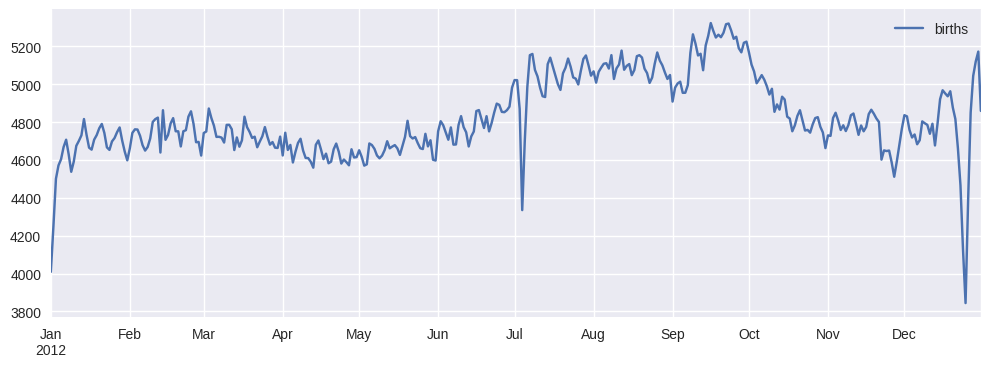

In [77]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Generate a plot of the birth total for each day or the month, by decades

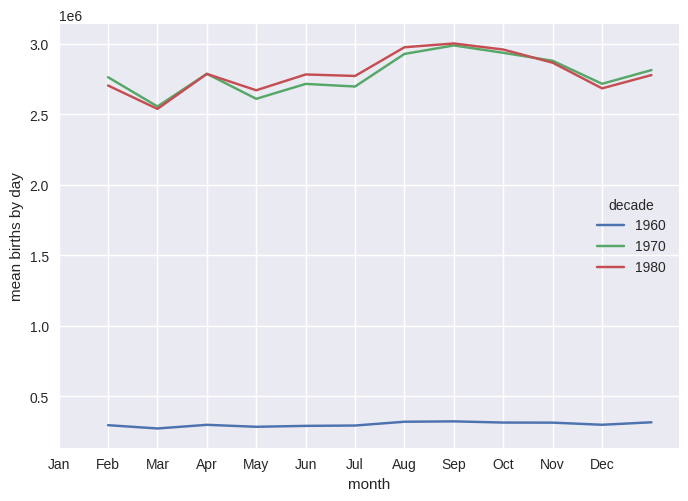

In [78]:
## plot of average number of births by days of the week by decade
births_subset.pivot_table('births', index='month',
                    columns='decade', aggfunc='sum').plot()
plt.gca().set(xticks=range(12),
              xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('mean births by day')
plt.show()

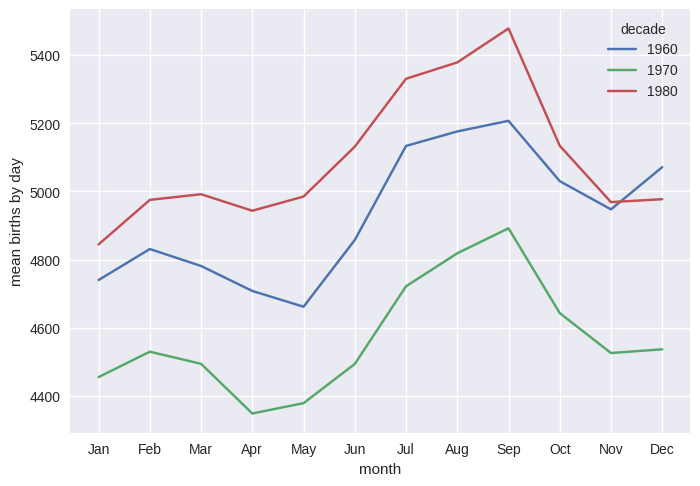

In [79]:
## plot of average number of births by days of the week by decade
births_subset.pivot_table('births', index='month',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(1,13),
              xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('mean births by day')
plt.show()

In [80]:
births_by_date.head(45)

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
2012-01-06,4668.150
2012-01-07,4706.925
2012-01-08,4629.650
2012-01-09,4537.775
2012-01-10,4591.700


In [81]:
births_by_date.shape

(366, 1)

In [82]:
# Group the data by date and decade
births_by_decade = births_subset.groupby([births_subset.index.date, births_subset.decade]).sum()

<ipython-input-82-c843f35fb454>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  births_by_decade = births_subset.groupby([births_subset.index.date, births_subset.decade]).sum()


In [83]:
births_by_decade.head()

,,year,month,day,births,dayofweek
,decade,,,,,
1969-01-01,1960,3938,2,2.0,8486,4
1969-01-02,1960,3938,2,4.0,9002,6
1969-01-03,1960,3938,2,6.0,9542,8
1969-01-04,1960,3938,2,8.0,8960,10
1969-01-05,1960,3938,2,10.0,8390,12


In [84]:
births_by_decade=births_by_decade.reset_index()
births_by_decade

,level_0,decade,year,month,day,births,dayofweek
0,1969-01-01,1960,3938,2,2.0,8486,4
1,1969-01-02,1960,3938,2,4.0,9002,6
2,1969-01-03,1960,3938,2,6.0,9542,8
3,1969-01-04,1960,3938,2,8.0,8960,10
4,1969-01-05,1960,3938,2,10.0,8390,12
...,...,...,...,...,...,...,...
7300,1988-12-27,1980,3976,24,54.0,11528,2
7301,1988-12-28,1980,3976,24,56.0,11847,4
7302,1988-12-29,1980,3976,24,58.0,11704,6
7303,1988-12-30,1980,3976,24,60.0,11837,8


In [85]:
births_by_decade.groupby('day').mean()

<ipython-input-85-d92f86feea4d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  births_by_decade.groupby('day').mean()


,decade,year,month,births,dayofweek
day,,,,,
2.0,1974.000000,3957.000000,13.000000,9528.558333,5.983333
4.0,1974.000000,3957.000000,13.000000,9596.533333,6.000000
6.0,1974.000000,3957.000000,13.000000,9621.195833,5.958333
8.0,1974.000000,3957.000000,13.000000,9527.450000,6.033333
10.0,1974.000000,3957.000000,13.000000,9570.629167,5.991667
12.0,1974.000000,3957.000000,13.000000,9616.970833,6.066667
14.0,1974.000000,3957.000000,13.000000,9642.004167,5.966667
16.0,1974.000000,3957.000000,13.000000,9676.566667,5.983333
18.0,1974.000000,3957.000000,13.000000,9646.062500,6.000000


In [86]:
births_1960 = births_by_decade[births_by_decade['decade']==1960]
births_1970 = births_by_decade[births_by_decade['decade']==1970]
births_1980 = births_by_decade[births_by_decade['decade']==1980]

In [ ]:
births_1960.shape, births_1970.shape , births_1980.shape

((365, 6), (3652, 6), (3288, 6))

In [89]:
np.arange(1,365)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

ValueError: ignored

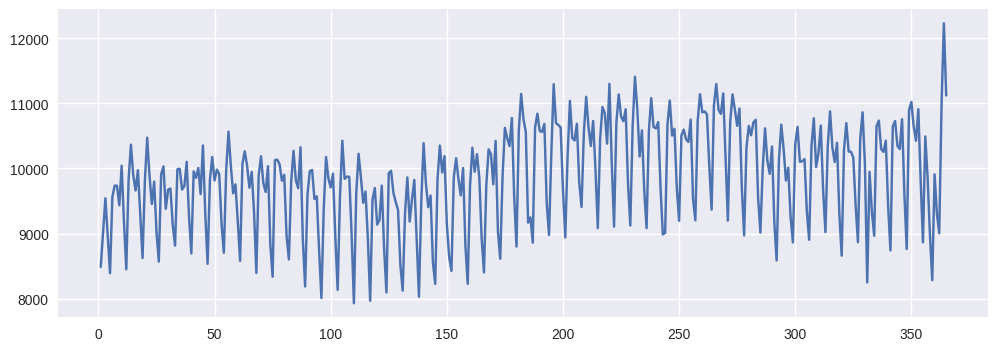

In [91]:
# Plot the total births by date by decade
fig, ax = plt.subplots(figsize=(12, 4))
x = np.arange(1,366)
y1=births_1960['births']
y2=births_1970['births']
y3=births_1980['births']
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [92]:
births_subset.groupby('month')[['births']].mean()


,births
month,
1,4644.487903
2,4745.650442
3,4732.370968
4,4633.979167
5,4665.500000
6,4798.809167
7,5016.366935
8,5088.519355
9,5171.643333


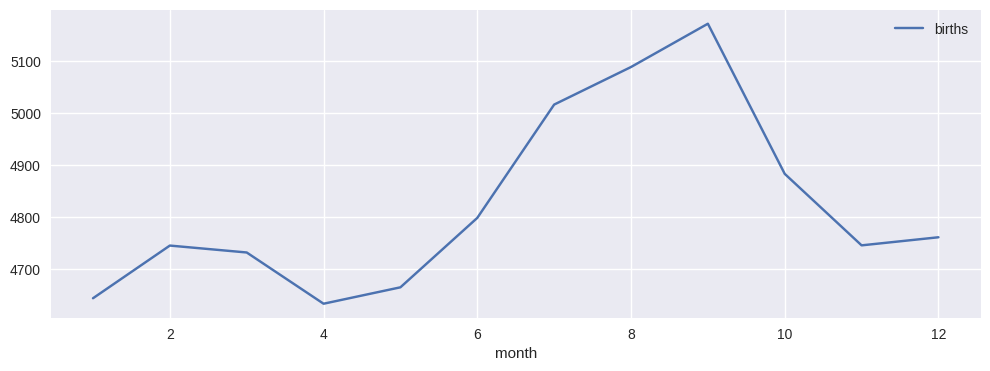

In [93]:
births_subset.groupby('month')[['births']].mean().plot(figsize=(12, 4))
plt.show()

In [94]:
births.head()

,year,month,day,gender,births,decade,Z-score
0,1969,1,1.0,F,4046,1960,-0.200210
1,1969,1,1.0,M,4440,1960,-0.186410
2,1969,1,2.0,F,4454,1960,-0.185920
3,1969,1,2.0,M,4548,1960,-0.182627
4,1969,1,3.0,F,4548,1960,-0.182627


In [95]:
births_by_day = births.pivot_table(index='day', columns=['month', 'decade'], values='births', aggfunc='sum')
births_by_day.head()

month       1                         2                          3            \
decade    1960     1970     1980    1960     1970     1980     1960     1970   
day                                                                            
1.0     8486.0  76989.0  74894.0  9130.0  89541.0  87787.0   9186.0  92322.0   
2.0     9002.0  82038.0  78856.0  8814.0  91785.0  89122.0   8580.0  92122.0   
3.0     9542.0  87009.0  83485.0  9988.0  90537.0  89948.0  10068.0  93157.0   
4.0     8960.0  87959.0  85935.0  9996.0  89304.0  91133.0  10264.0  89763.0   
5.0     8390.0  89153.0  86602.0  9676.0  89924.0  89532.0  10046.0  90101.0   

month                4   ...       9        10                         11  \
decade     1980    1960  ...     1980     1960     1970     1980     1960   
day                      ...                                                
1.0     88179.0  9960.0  ...  93214.0  10910.0  97048.0  98735.0   9342.0   
2.0     89320.0  9978.0  ...  97091.0  10656.0  97621.0  95868.0   8904.0   
3.0     91646.0  9530.0  ...  96732.0  10922.0  96199.0  95574.0  10338.0   
4.0     92835.0  9572.0  ...  96556.0   9710.0  96693.0  93804.0  10772.0   
5.0     91117.0  8748.0  ...  92628.0   8972.0  97427.0  94604.0  10020.0   

month                          12                    
decade     1970     1980     1960     1970     1980  
day                                                  
1.0     91273.0  88577.0  10648.0  90304.0  92508.0  
2.0     91128.0  89054.0  10736.0  89317.0  93159.0  
3.0     91221.0  91312.0  10300.0  89471.0  90569.0  
4.0     88650.0  94554.0  10254.0  91366.0  87129.0  
5.0     90235.0  92068.0  10428.0  90956.0  88003.0  

[5 rows x 36 columns]

In [96]:
births_by_day.head().reset_index()

month   day       1                         2                          3  \
decade         1960     1970     1980    1960     1970     1980     1960   
0       1.0  8486.0  76989.0  74894.0  9130.0  89541.0  87787.0   9186.0   
1       2.0  9002.0  82038.0  78856.0  8814.0  91785.0  89122.0   8580.0   
2       3.0  9542.0  87009.0  83485.0  9988.0  90537.0  89948.0  10068.0   
3       4.0  8960.0  87959.0  85935.0  9996.0  89304.0  91133.0  10264.0   
4       5.0  8390.0  89153.0  86602.0  9676.0  89924.0  89532.0  10046.0   

month                     ...        9       10                         11  \
decade     1970     1980  ...     1980     1960     1970     1980     1960   
0       92322.0  88179.0  ...  93214.0  10910.0  97048.0  98735.0   9342.0   
1       92122.0  89320.0  ...  97091.0  10656.0  97621.0  95868.0   8904.0   
2       93157.0  91646.0  ...  96732.0  10922.0  96199.0  95574.0  10338.0   
3       89763.0  92835.0  ...  96556.0   9710.0  96693.0  93804.0  10772.0   
4       90101.0  91117.0  ...  92628.0   8972.0  97427.0  94604.0  10020.0   

month                          12                    
decade     1970     1980     1960     1970     1980  
0       91273.0  88577.0  10648.0  90304.0  92508.0  
1       91128.0  89054.0  10736.0  89317.0  93159.0  
2       91221.0  91312.0  10300.0  89471.0  90569.0  
3       88650.0  94554.0  10254.0  91366.0  87129.0  
4       90235.0  92068.0  10428.0  90956.0  88003.0  

[5 rows x 37 columns]

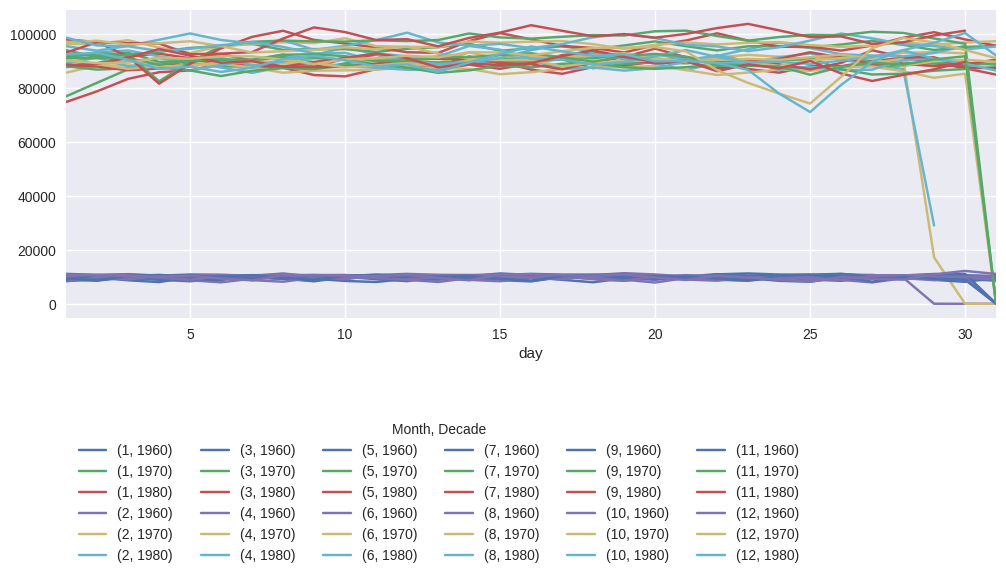

In [97]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_day.plot(ax=ax);
plt.legend(title='Month, Decade', bbox_to_anchor=(0, -0.3), loc='upper left', ncol=6)
plt.xlim(1, 31)
plt.show()

This graph shows the total number of births by year and gender, using a stacked bar chart. The x-axis represents the years, the y-axis represents the total number of births, and the colors of the bars represent the genders.


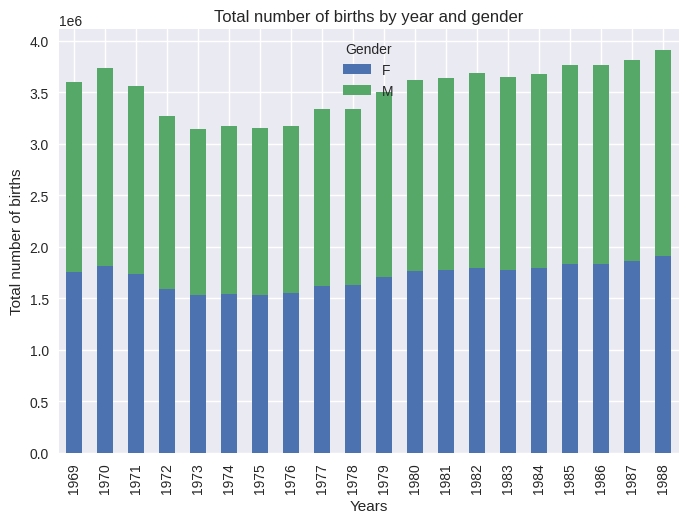

In [100]:
import matplotlib.pyplot as plt

# Grafica de conteo de nacimientos por año y género
births_subset.groupby(['year', 'gender'])['births'].sum().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Years')
plt.ylabel('Total number of births')
plt.title('Total number of births by year and gender')
plt.legend(title='Gender')

plt.show()


 The average number of births by decade
 

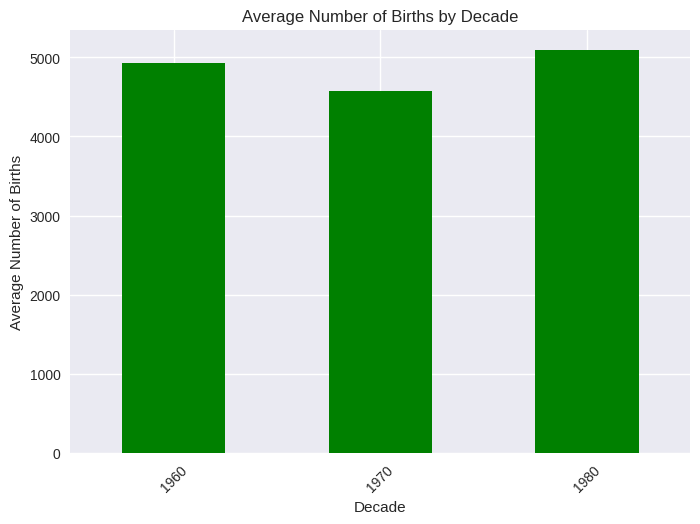

In [101]:
import matplotlib.pyplot as plt

# Group the data by decade and calculate the average number of births
births_subset.groupby('decade')['births'].mean().plot(kind='bar', color='green')

plt.xlabel('Decade')
plt.ylabel('Average Number of Births')
plt.title('Average Number of Births by Decade')
plt.xticks(rotation=45)
plt.show()


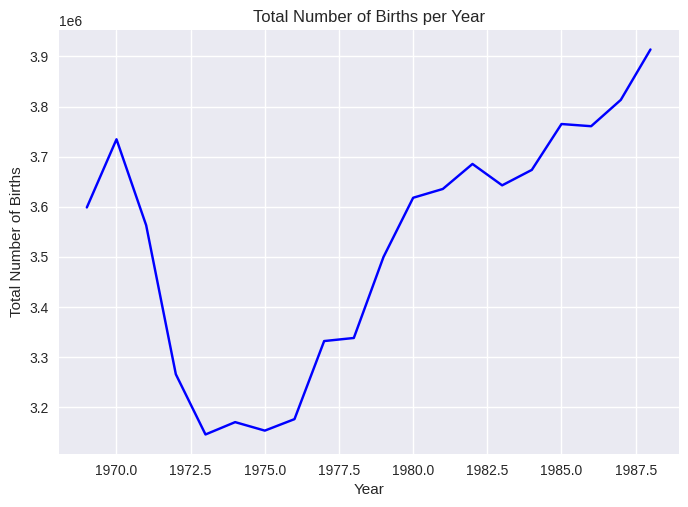

In [104]:

pivot_table = births_subset.pivot_table('births', index='year', columns='gender', aggfunc='sum')

# Calculate the total number of births per year
pivot_table['total_births'] = pivot_table['F'] + pivot_table['M']

# Plot the total number of births per year
pivot_table['total_births'].plot(kind='line', color='blue')

plt.xlabel('Year')
plt.ylabel('Total Number of Births')
plt.title('Total Number of Births per Year')
plt.show()

